Instructor Led Lab
Lewis Hughes 

In [2]:
#Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
#Loading the Dataset
hospital_df = pd.read_csv("data/calihospital.txt", sep="\t")
hospital_df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


In [5]:
#Selecting 7 Numerical Columns for PCA

hospital_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
hospital_data = hospital_df[hospital_cols].dropna()
display(hospital_data.describe())

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
count,61.000000,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01,61.000000
mean,1350.264262,6.695836e+05,1.662706e+08,9.015808e+07,2.562733e+08,-1.553491e+05,194.524590
std,2025.285385,1.097513e+06,2.827876e+08,1.372897e+08,4.249851e+08,7.154457e+07,221.832941
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000
25%,215.500000,6.579243e+04,1.368450e+07,1.426128e+07,2.416452e+07,-1.108177e+06,42.000000
50%,374.320000,1.723989e+05,3.184268e+07,3.491622e+07,6.339822e+07,1.572695e+06,99.000000
75%,1216.000000,5.409751e+05,1.737450e+08,9.306671e+07,1.998738e+08,6.198330e+06,234.000000
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000


In [8]:
#Standardizing the Data

scaler = StandardScaler()
hospital_scaled = scaler.fit_transform(hospital_data)
display(pd.DataFrame(hospital_scaled, columns=hospital_cols).head())

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,-0.509437,-0.490651,-0.519672,-0.405714,-0.489551,-0.075407,-0.815994
1,-0.500476,-0.490066,-0.473590,-0.512703,-0.481442,-0.004074,-0.434189
2,-0.372926,-0.434082,-0.460017,-0.384296,-0.434983,-0.028152,-0.397826
3,-0.473094,-0.487297,-0.509466,-0.481029,-0.486814,0.045039,-0.634182
4,-0.541798,-0.507851,-0.544056,-0.550810,-0.506368,0.199512,-0.693271


In [9]:
#PCA

pca = PCA()
pca.fit(hospital_scaled)
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91421084e-22]


Based on the eigenvalues, we would keep the first two principal components, as they meet the criterion and explain a large portion of the variance.

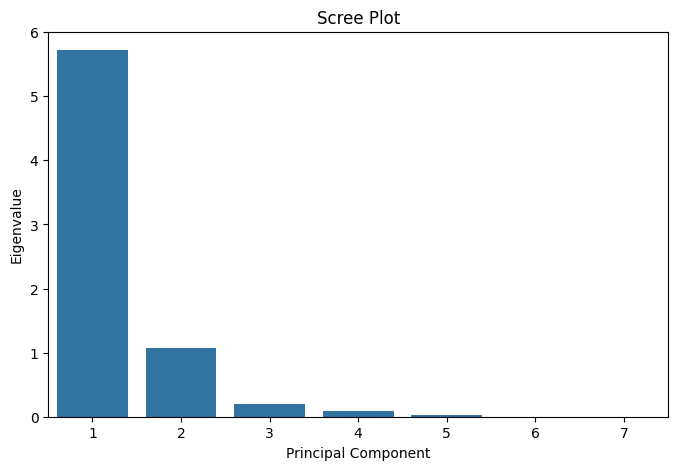

In [10]:
#Scree Plot 

plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, len(eigenvalues) + 1)), y=eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [11]:
#K-Means Clustering

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
hospital_df['Cluster'] = kmeans.fit_predict(hospital_scaled)
display(hospital_df[['Cluster'] + hospital_cols].head())

,Cluster,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,0,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,0,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,0,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,0,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,0,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


I chose k=3 because it offeres a balance between interpretability and differentiation. 

In [13]:
#Evaluating the Cluster Quality with Confusion Matrices

print("Teaching vs Cluster:")
display(pd.crosstab(hospital_df['Teaching'], hospital_df['Cluster']))

print("\nTypeControl vs Cluster:")
display(pd.crosstab(hospital_df['TypeControl'], hospital_df['Cluster']))

print("\nDonorType vs Cluster:")
display(pd.crosstab(hospital_df['DonorType'], hospital_df['Cluster']))

Teaching vs Cluster:


Cluster,0,1,2
Teaching,,,
Small/Rural,44,0,0
Teaching,2,3,12



TypeControl vs Cluster:


Cluster,0,1,2
TypeControl,,,
City/County,2,0,5
District,14,0,0
Investor,3,0,0
Non Profit,27,3,7



DonorType vs Cluster:


Cluster,0,1,2
DonorType,,,
Alumni,2,3,12
Charity,44,0,0


Based on the three variables, the best grouping cariable is DonorType because all of the Charity hospitals fall into Cluster 0 and the Alumni hospitals are spread mainly across Cluster 2.